# Data Analysis with pandas

This notebook is about ```pandas```, a library for data analysis with a focus on tabular data. pandas is a powerful tool that not only provides many useful classes and functions but also does a great job of wrapping functionality from other packages. The result is a user interface that makes data analysis, and in particular financial analysis, a convenient and efficient task.

At the core of pandas is the ```DataFrame```, a class designed to effi‐ ciently handle data in tabular form—i.e., data characterized by a columnar organization.

To this end, the DataFrame class provides, for instance, column labeling as well as flexible indexing capabilities for the rows (records) of the data set, similar to a table in a relational database or an Excel spreadsheet. 

This section covers some fundamental aspects of the pandas DataFrame class. The class is so complex and powerful that only a fraction of its capabilities can be presented here.




## First Steps with the DataFrame Class
On a fundamental level, the ```DataFrame``` class is designed to manage indexed and labeled data, not too different from a ```SQL``` database table or a worksheet in a spread‐ sheet application. Consider the following creation of a ```DataFrame object```:


In [ ]:
import pandas as pd

df = pd.DataFrame([10, 20, 30, 40],
                  columns=['numbers'], # Specify the column labels
                  index=['a', 'b', 'c', 'd']) # Specify the index values/labels

df

,numbers
a,10
b,20
c,30
d,40


This simple example already shows some major features of the DataFrame class when it comes to storing data:
* Data itself can be provided in different shapes and types (list, tuple, ndarray,and dict objects are candidates).
* Data is organized in columns, which can have custom names (labels).
* There is an index that can take on different formats (e.g., numbers, strings, time information).

Working with a DataFrame object is in general pretty convenient and efficient with regard to the handling of the object, e.g., compared to regular ndarray objects, which are more specialized and more restricted when one wants to (say) enlarge an existing
object. 

At the same time, DataFrame objects are often as computationally efficient as ndarray objects. The following are simple examples showing how typical operations on a DataFrame object work:

In [ ]:
df.index # The index attribute and Index object

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns 

Index(['numbers'], dtype='object')

In [ ]:
df.loc['c'] # Selects the value corresponding to index c

numbers    30
Name: c, dtype: int64

In [ ]:
df.loc[['a', 'd']] # Selects the two values corresponding to indices a and d

,numbers
a,10
d,40


In [ ]:
df.iloc[1:3] # Selects the second and third rows via the index positions

,numbers
b,20
c,30


In [ ]:
df.sum() # Calculates the sum of the single column

numbers    100
dtype: int64

In [ ]:
df.apply(lambda x: x ** 2) # Use the apply method to calculate squares in vectorized fashion

,numbers
a,100
b,400
c,900
d,1600


In [ ]:
df ** 2 # Applies vectorization directly as with ndarray objects

,numbers
a,100
b,400
c,900
d,1600


Unlike NumPy ndarray objects, enlarding the DataFrame object in both dimensions is possible:

In [ ]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # Adds a new column with float objects provided as a tuple object
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [ ]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [ ]:
# A whole DataFrame object can also be taken to define a new column - indices are aligned automatically
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'],
                           index=['d', 'a', 'b', 'c']) 
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


In [ ]:
df[['numbers', 'floats']].mean() # Calculates the mean over two columns specified

numbers    25.0
floats      3.0
dtype: float64

In [ ]:
df[['numbers', 'floats']].std() # Calculates the standard deviation over the two columns

numbers    12.909944
floats      1.290994
dtype: float64

## Second Steps with the DataFrame Class
The example in this subsection is based on an ndarray object with standard normally
distributed random numbers. It explores further features such as a DatetimeIndex to
manage time series data:

In [ ]:
import numpy as np

np.random.seed(100)
a = np.random.standard_normal((9,4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

Although one can construct DataFrame objects more directly (as seen before), using an ndarray object is generally a good choice since pandas will retain the basic structure and will “only” add metainformation (e.g., index values). It also represents a typical use case for financial applications and scientific research in general. For example:

In [17]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


As with structured arrays, and as seen before, DataFrame objects have column names
that can be defined directly by assigning a list object with the right number of elements. This illustrates that one can define/change the attributes of the DataFrame
object easily:

In [18]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [19]:
df['No2'].mean()

0.701033094145646

To work with financial time series data efficiently, one must be able to handle time indices well. This can also be considered a major strength of pandas. For example, assume that our nine data entries in the four columns correspond to month-end data, beginning in January 2019. A DatetimeIndex object is then generated with the date_range() function as follows:

In [20]:
dates = pd.date_range('2019-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [22]:
df.index = dates 
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


When it comes to the generation of DatetimeIndex objects with the help of the
date_range() function, there are a number of choices for the frequency parameter
freq

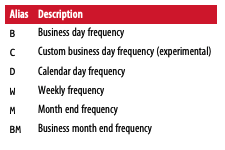

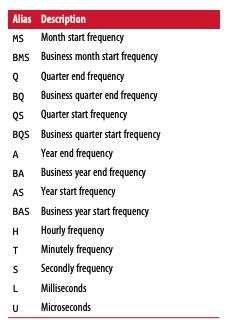

## Basic Analytics

Like the NumPy ndarray class, the pandas DataFrame class has a multitude of convenience methods built in. As a starter, consider the methods info() and describe():

In [23]:
df.info() # Provides meta information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [24]:
df.describe() # Provides a helpful summary statistics per column

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [25]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [26]:
df.mean(axis=0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [27]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


In [28]:
#DataFrame objects also understand NumPy universal functions
np.log(df)

,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [29]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


pandas is quite error tolerant, in the sense that it captures errors and just puts a NaN
value where the respective mathematical operation fails. Not only this, but as briefly
shown before, one can also work with such incomplete data sets as if they were complete in a number of cases. This comes in handy, since reality is characterized by
incomplete data sets more often than one might wish

## Basic Visualization

Plotting of data is only one line of code away in general, once the data is stored in a
DataFrame object

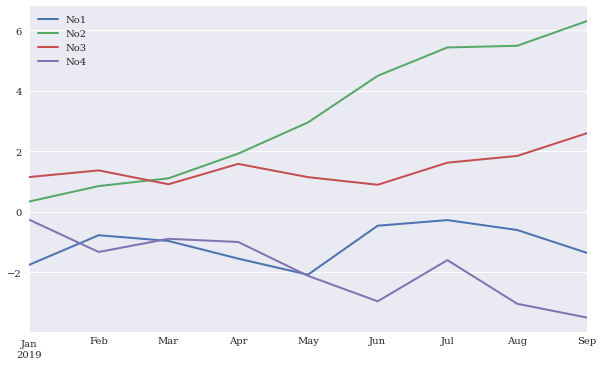

In [31]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# Let's plot the cumulative sums of the four columns as a line plot
df.cumsum().plot(lw=2.0, figsize=(10, 6)) 

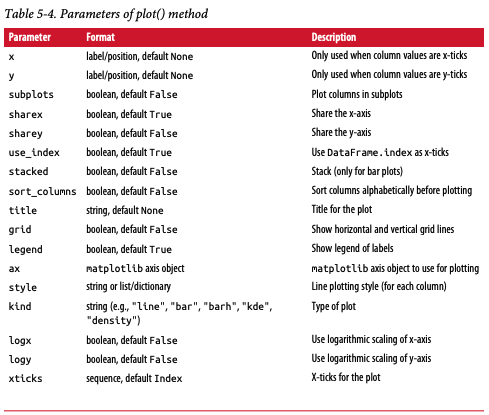

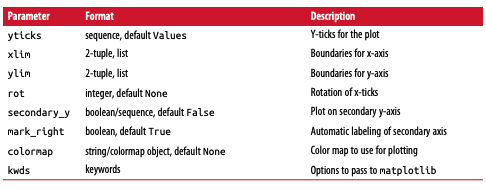

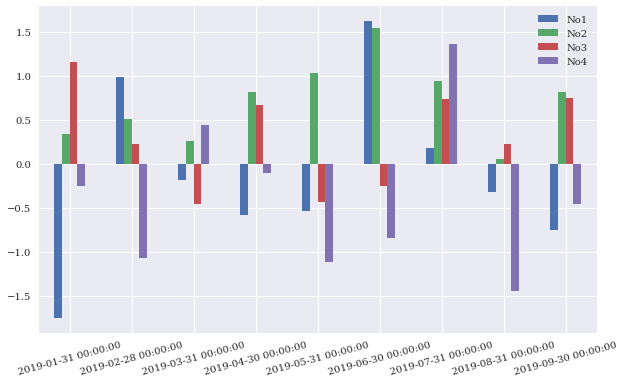

In [32]:
# Let's visualize the same data as a bar plot
df.plot.bar(figsize=(10, 6), rot=15)

## The Series Class

Series is
another important class that comes with pandas. It is characterized by the fact that it has only a single column of data. In that sense, it is a specialization of the DataFrame class that shares many but not all of its characteristics and capabilities. A Series object is obtained when a single column is selected from a multicolumn DataFrame object:

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [35]:
type(S)

pandas.core.series.Series

In [37]:
s = df['No1']
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [38]:
type(s)

pandas.core.series.Series

In [39]:
s.mean()

-0.15021177307319458

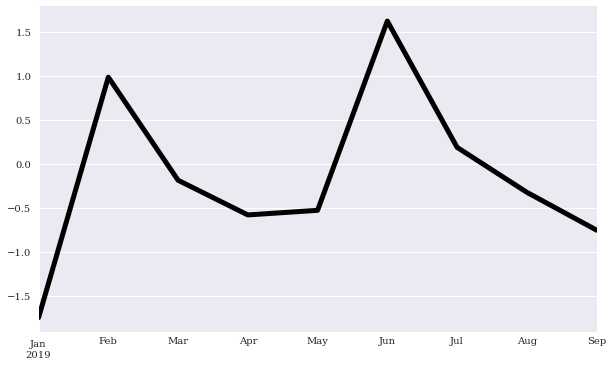

In [45]:
s.plot(lw=5.0, figsize=(10,6), color='black')

## GroupBy Operations

pandas has powerful and flexible grouping capabilities. They work similarly to grouping in SQL as well as pivot tables in Microsoft Excel. 

To have something to group by one can add, for instance, a column indicating the quarter the respective data of the index belongs to:

In [47]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3'] 
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [49]:
# Let's group the by the Quarter column and output some statistics
groups = df.groupby('Quarter')
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [50]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [52]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [53]:
groups.aggregate([min, max]).round(2) # Gives both the min and max values per column

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [55]:
# Grouping can be done with multiple columns
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

## Complex Selection

Often, data selection is accomplished by formulation of conditions on column values,
and potentially combining multiple such conditions logically. Consider the following
data set:

In [56]:
data = np.random.standard_normal((10, 2))
df = pd.DataFrame(data, columns=['x', 'y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [57]:
df.head() # The first five rows 

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [58]:
df.tail() # The final five rows

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [59]:
df['x'] > 0.5 # Check whether value in column x is greater than 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [ ]:
(df['x'] > 0) & (df['y'] < 0) # Check whether value in column x is positive and value in column y is negative

Using the resulting Boolean Series objects, complex data (row) selection is straightforward. Alternatively, one can use the query() method and pass the conditions as
str objects:

In [60]:
df[df['x'] > 0] # All rows for which the value in column x is greater than 0

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [61]:
df.query('x > 0 & y < 0') # All rows for which the value in column x is positive and the value in column y is negative

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


## Concatenation, Joining, and Merging

This section walks through different approaches to combine two simple data sets in
the form of DataFrame objects. The two simple data sets are:

In [62]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns=['A',])
df1

,A
a,100
b,200
c,300
d,400


In [63]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index=['f', 'b', 'd'],
                   columns=['B',])
df2

,B
f,200
b,150
d,50


In [66]:
# Concatenation (appending)
df1.append(df2, sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [67]:
df1.append(df2, ignore_index=True, sort=False) 

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [68]:
# Joining
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [69]:
# There are a total of four different join methods available, each leading to a different
# behavior with regard to how index values and the corresponding data rows are
# handled:
df1.join(df2, how="left")

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [70]:
df1.join(df2, how="right")

,A,B
f,NaN,200
b,200,150
d,400,50


In [71]:
# Merging
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [72]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [73]:
# By default, the merge operation in this case takes place based on the single shared
# column C. Other options are available, however, such as an outer merge:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [74]:
pd.merge(df1, df2, how="outer") # Outer merge preserving all data rows

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


## Conclusion
```pandas``` is a powerful tool for data analysis and has become the central package in the
so-called PyData stack. 

Its ```DataFrame``` class is particularly suited to working with tabular data of any kind. Most operations on such objects are vectorized, leading not
only—as in the NumPy case—to concise code but also to high performance in general.

In addition, pandas makes working with incomplete data sets convenient (which is
not the case with NumPy, for instance). pandas and the DataFrame class will be central
in many later notebooks.